# Question 5

#### import libraries

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

#### Global variables

In [2]:
EPSILON = 0.001
MAX_ITER = 10000
_ = np.seterr('ignore')

#### Functions

In [3]:
def plot_function():
    """
    Plot the function:

    .. math:: f(x_1, x_2) = (x_1 - 2)^2 + (x_2 - 3)^2
    """
    x1 = np.linspace(0, 5, 50)
    x2 = np.linspace(0, 5, 50)
    X1, X2 = np.meshgrid(x1, x2)
    Y = f(X1, X2)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    plt.show()


def gradient_descent(x1_0, x2_0, max_iter, rho):
    """
    This function runs gradient descent.
    :param x1_0: initial x1
    :param x2_0: initial x2
    :param max_iter: max number of iteration
    :param rho: learning rate
    :return:
    """
    point_list = [np.array([x1_0, x2_0, f(x1_0, x2_0)])]
    curr_point = np.array([x1_0, x2_0, 0])
    for i in range(0, max_iter):
        new_point, new_dir = single_descent(curr_point, rho)
        point_list += [new_point]
        curr_point = new_point

        if np.linalg.norm(new_dir) < EPSILON:
            print("The total number of iterations is: {}".format(i + 1))
            return point_list
        elif np.any(np.isinf(curr_point)):
            print("It reaches infinite, does not converge!\n"
                  "The total number of iterations is: {}".format(i + 1))
            return point_list
    print("Exceeds max iteration: {}; with learning rate: {}".format(max_iter, rho))
    return point_list


def single_descent(point, rho):
    """
    This function
    :param point: The current point
    :param rho: The learning rate
    :return: The next point and the moving direction
    """
    x1 = point[0]
    x2 = point[1]
    x1_dir = 2. * (x1 - 2.)
    x2_dir = 2. * (x2 - 3.)
    new_x1 = x1 - x1_dir * rho
    new_x2 = x2 - x2_dir * rho
    new_y = f(new_x1, new_x2)
    return np.array([new_x1, new_x2, new_y]), np.array([x1_dir, x2_dir])


def f(x1, x2):
    """
    Find y from function f(x1,x2) = (x1 - 2)^2 + (x2 - 3)^2
    :param x1: input x1
    :param x2: input x2
    :return: f(x1,x2)
    """
    return np.power(x1 - 2., 2) + np.power(x2 - 3., 2)


def plot_learning_points(points):
    """
    Plot the points sequence generated by gradient descent
    :param points: Input points generated from gradient descent
    """
    df = pd.DataFrame(points, columns=['x1', 'x2', 'y'])
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    xs = df['x1'].values.tolist()
    ys = df['x2'].values.tolist()
    zs = df['y'].values.tolist()
    ax = plt.axes(projection='3d')
    ax.scatter3D(xs, ys, zs, c=zs)
    ax.plot3D(xs, ys, zs, 'gray')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    plt.show()

#### Plot the function f

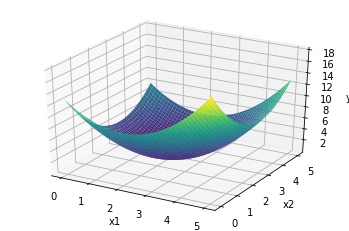

In [4]:
plot_function()

#### Question 3:

initial point is (1,2)

learning rate is 0.01

The total number of iterations is: 395


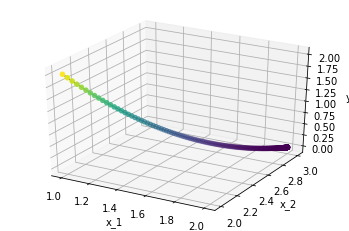

In [5]:
point_result1 = gradient_descent(1, 2, 10000, 0.01)
plot_learning_points(point_result1)
# print("Folloing is the sequence of points \n{}".format(point_result1))

#### Question 4:

initial point is (1,2)

learning rate is 0.05

The total number of iterations is: 2


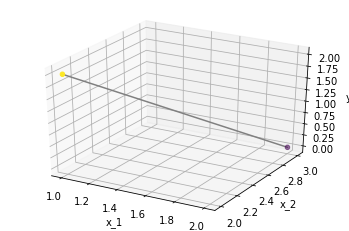

In [6]:
point_result2 = gradient_descent(1, 2, 10000, 0.5)
plot_learning_points(point_result2)
# print("Folloing is the sequence of points \n{}".format(point_result2))

#### Question 5:

initial point is (1,2)

learning rate is 10

It reaches infinite, does not converge!
The total number of iterations is: 121


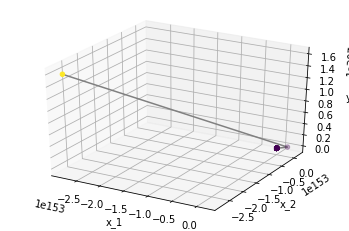

Folloing is the sequence of points 
[array([1., 2., 2.]), array([ 21.,  22., 722.]), array([  -359.,   -358., 260642.]), array([6.8610000e+03, 6.8620000e+03, 9.4091762e+07]), array([-1.30319000e+05, -1.30318000e+05,  3.39671261e+10]), array([2.47610100e+06, 2.47610200e+06, 1.22621325e+13]), array([-4.70458790e+07, -4.70458780e+07,  4.42662984e+15]), array([8.93871741e+08, 8.93871742e+08, 1.59801337e+18]), array([-1.69835630e+10, -1.69835630e+10,  5.76882827e+20]), array([3.22687698e+11, 3.22687698e+11, 2.08254701e+23]), array([-6.13106626e+12, -6.13106626e+12,  7.51799469e+25]), array([1.16490259e+14, 1.16490259e+14, 2.71399608e+28]), array([-2.21331492e+15, -2.21331492e+15,  9.79752586e+30]), array([4.20529835e+16, 4.20529835e+16, 3.53690684e+33]), array([-7.99006686e+17, -7.99006686e+17,  1.27682337e+36]), array([1.51811270e+19, 1.51811270e+19, 4.60933236e+38]), array([-2.88441414e+20, -2.88441414e+20,  1.66396898e+41]), array([5.48038686e+21, 5.48038686e+21, 6.00692802e+43]), array(

In [7]:
point_result3 = gradient_descent(1, 2, 500, 10)
plot_learning_points(point_result3)
# print("Folloing is the sequence of points \n{}".format(point_result3))